In [45]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import time
from datetime import datetime as dt
from dateutil import parser

pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

# Summary
1. [Data Cleaning](#cleaning)

In [2]:
df = pd.read_csv('Dallas_Half_Marathon_Results.csv', header=0)

df.columns

Index(['Gun_Time', 'Chip_Time', 'Bib', 'First_Name', 'Last_Name', 'Share',
       'Race_Photos', 'City', 'State', 'Division', 'Class_Position',
       'Overall_Place', 'Team', 'Age', 'Zip', 'Gen_Place', 'Total_Pace',
       'Tot_Div', 'Tot_Gend', 'Tot_AG', '5K', '5K_Pace', '10K', '10K_Pace',
       '15K', '15K_Pace', '11.5M', '11.5M_Pace', '13.1M', '13.1M_Pace'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Data columns (total 30 columns):
Gun_Time          6539 non-null object
Chip_Time         6539 non-null object
Bib               6539 non-null int64
First_Name        6539 non-null object
Last_Name         6539 non-null object
Share             0 non-null float64
Race_Photos       0 non-null float64
City              6433 non-null object
State             6420 non-null object
Division          6539 non-null object
Class_Position    6539 non-null object
Overall_Place     6539 non-null object
Team              0 non-null float64
Age               6539 non-null int64
Zip               6433 non-null object
Gen_Place         6539 non-null object
Total_Pace        6500 non-null object
Tot_Div           6539 non-null int64
Tot_Gend          6539 non-null int64
Tot_AG            6539 non-null int64
5K                6506 non-null object
5K_Pace           6506 non-null object
10K               6504 non-null object
10K_Pac

<a id='cleaning'></a>
## Cleaning

In [4]:
#Drop Unneccesary COlumns
drop_cols = ['Bib','Share','Race_Photos','Team',
             '5K_Pace','10K_Pace','15K_Pace','11.5M_Pace','13.1M_Pace', 'Gun_Time']

df = df.drop(drop_cols, axis=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Data columns (total 20 columns):
Chip_Time         6539 non-null object
First_Name        6539 non-null object
Last_Name         6539 non-null object
City              6433 non-null object
State             6420 non-null object
Division          6539 non-null object
Class_Position    6539 non-null object
Overall_Place     6539 non-null object
Age               6539 non-null int64
Zip               6433 non-null object
Gen_Place         6539 non-null object
Total_Pace        6500 non-null object
Tot_Div           6539 non-null int64
Tot_Gend          6539 non-null int64
Tot_AG            6539 non-null int64
5K                6506 non-null object
10K               6504 non-null object
15K               6483 non-null object
11.5M             6067 non-null object
13.1M             6500 non-null object
dtypes: int64(4), object(16)
memory usage: 1021.8+ KB


In [5]:
df.shape

(6539, 20)

In [6]:
#separate did not finish
dnf = df[df['Chip_Time']=='DNF'].index

df = df.drop(dnf, axis=0)
df.shape

(6499, 20)

### Missing Data

In [7]:
df.isna().sum()

Chip_Time           0
First_Name          0
Last_Name           0
City              106
State             119
Division            0
Class_Position      0
Overall_Place       0
Age                 0
Zip               106
Gen_Place           0
Total_Pace          0
Tot_Div             0
Tot_Gend            0
Tot_AG              0
5K                 30
10K                22
15K                29
11.5M             442
13.1M               0
dtype: int64

In [8]:
#some values are missing state but not missing city... manually back in?
df[(df['State'].isna())&(df['City'].notna())]['City'].value_counts()

Mexico City                  4
Mexico                       2
Guatemala                    2
Austin                       1
San Pedro Garza Garcia       1
Frisco                       1
Fleury Merogis               1
La Magdalena Contreras Me    1
Name: City, dtype: int64

In [9]:
df['State'].value_counts().keys()

Index(['TX', 'OK', 'AR', 'IL', 'CA', 'CO', 'NY', 'LA', 'MO', 'KS', 'OH', 'FL',
       'VA', 'PA', 'TN', 'NM', 'NJ', 'GA', 'MN', 'MI', 'MD', 'WI', 'WA', 'DC',
       'IA', 'NC', 'MS', 'AL', 'AZ', 'MA', 'MEXICO', 'OR', 'NE', 'CDMX',
       'COAHUILA', 'KY', 'UT', 'SC', 'ON', 'GUATEMALA', 'HI', 'M�X.', 'AA',
       'LA LIBERTA', 'CT', 'VIC', 'SANTIAGO', 'REGI�N MET', 'RJ', 'HEREDIA',
       'TAMPS.', 'ME', 'IN', 'COAH.', 'NH', 'NUEVO LEON', 'WY', 'MEXICO CIT',
       'DE', 'NV', 'NL', 'PUEBLA'],
      dtype='object')

In [10]:
US_lst = ['TX', 'OK', 'AR', 'IL', 'CA', 'CO', 'NY', 'LA', 'MO', 'KS', 'OH', 
          'VA','FL', 'PA', 'TN', 'NJ', 'NM', 'GA', 'MN', 'MI', 'MD', 'IA', 
          'DC', 'WI','WA', 'NC', 'MS', 'AL', 'AZ', 'MA','NE', 'OR','KY','UT',
          'HI','WY', 'DE', 'NV', 'ME','SC','NH','CT', 'IN']
MX_lst = ['MEXICO','CDMX','COAHUILA','M�X.', 'LA LIBERTA','REGI�N MET', 
          'COAH.', 'HEREDIA', 'PUEBLA', 'VIC','SANTIAGO', 'TAMPS.','MEXICO CIT', 'NUEVO LEON','NL']
Brazil_lst = ['RJ']
Canada_lst = ['ON']
Guatemala = ['GUATEMALA']

#Should be texas ... cities are Garland and Dallas
Not_sure_lst = ['AA']

#Austin and Frisco entries are Texas
df.loc[df.City=='Austin','State']='TX'
df.loc[df.City=='Frisco','State']='TX'


In [11]:
#Clean up state names
df.loc[df['State']=='NUEVO LEON','State']='NL'
df.loc[df['State']=='NL','State']='Nuevo Leon'
df.loc[df['State']=='CDMX','State']='Mexico'
df.loc[df['State']=='M�X.','State']='Mexico'
df.loc[df['State']=='LA LIBERTA','State']='Chiapas'
df.loc[df['State']=='MEXICO CIT','State']='Mexico'
df.loc[df['State']=='TAMPS.','State']='Tamaulipas'
df.loc[df['State']=='COAH.','State']='Coahuila'
df.loc[df['State']=='MEXICO','State']='Mexico'
df.loc[df['State']=='COAHUILA','State']='Coahuila'
df.loc[df['State']=='SANTIAGO','State']='Santiago'
df.loc[df['State']=='PUEBLA','State']='Puebla'
df.loc[df['State']=='HEREDIA','State']='Heredia'
df.loc[df['State']=='VIC','State']='Victoria'
df.loc[df['City']=='Stgo','City']='Santiago'

In [12]:
#'Not Sure List'
df.loc[df.State.isin(Not_sure_lst),'State'] = 'TX'
df.loc[df.State.isin(Not_sure_lst),'Country'] = 'US'

#Mexico List
df.loc[df.State.isin(MX_lst),'Country'] = 'MX'
df.loc[df.City=='San Pedro Garza Garcia','Country'] = 'MX'
df.loc[df.City=='La Magdalena Contreras Me','Country'] = 'MX'

df.loc[df.State=='Mexico','Country'] = 'MX'
df.loc[df.State=='Coahuila','Country'] = 'MX'
df.loc[df.State=='Chiapas','Country'] = 'MX'
df.loc[df.State=='Nuevo Leon','Country'] = 'MX'
df.loc[df.State=='Tamaulipas','Country'] = 'MX'
df.loc[df.State=='Puebla','Country'] = 'MX'
df.loc[df.State=='Heredia','Country'] = 'MX'


#Handle Mexico City city list
df.loc[df.City=='Mexico City','Country'] = 'MX'

#Handle US List
df.loc[df.State.isin(US_lst),'Country'] = 'US'
df.loc[df.City=='Frisco','Country'] = 'US'
df.loc[df.City=='Austin','Country'] = 'US'

#Handle Brazil List
df.loc[df.State.isin(Brazil_lst),'Country'] = 'BR'

#Handle Canada List
df.loc[df.State.isin(Canada_lst),'Country'] = 'CAN'

#Handle Guatemala List
df.loc[df.State.isin(Guatemala),'Country'] = 'GT'
df.loc[df.City=='Guatemala','Country'] = 'GT'

#Handle France list
df.loc[df.City=='Fleury Merogis','Country'] = 'FR'

#Chile
df.loc[df['State']=='REGI�N MET','Country'] = 'CL'
df.loc[df['State']=='REGI�N MET','State'] = 'Santiago'
df.loc[df['State']=='Santiago','Country'] = 'CL'

#Costa Rica
df.loc[df['State']=='HEREDIA','Country'] = 'CR'

#Australia
df.loc[df['State']=='VIC','Country'] = 'AUS'
df.loc[df['City']=='Torquay','Country'] = 'AUS'



In [13]:
df.loc[df.City=='San Pedro Garza Garcia', 'State'] = 'Nuevo Leon'
df.loc[df.City=='Fleury Merogis', 'State'] = 'Essonne'
df.loc[df.City=='Mexico', 'State'] = 'Mexico City'
df.loc[df.City=='Mexico City', 'State'] = 'Mexico City'
df.loc[df.City=='La Magdalena Contreras Me', 'State'] = 'Mexico City'
df.loc[df.City=='Guatemala', 'State'] = 'Guatemala'
df.loc[df.State=='Mexico City', 'Country'] = 'MX'


In [14]:
df.isna().sum()

Chip_Time           0
First_Name          0
Last_Name           0
City              106
State             106
Division            0
Class_Position      0
Overall_Place       0
Age                 0
Zip               106
Gen_Place           0
Total_Pace          0
Tot_Div             0
Tot_Gend            0
Tot_AG              0
5K                 30
10K                22
15K                29
11.5M             442
13.1M               0
Country           106
dtype: int64

In [15]:
#Fill NA
df.loc[((df.City.isna()) & (df.State.isna()) & (df.Zip.isna()) & (df.Country.isna())) ,['City','State','Zip', 'Country']] = 'Not Disclosed'


In [16]:
pd.DataFrame({'Count':df.isna().sum(), 'Percent':round(df.isna().sum()/df.shape[0],1)})

,Count,Percent
Chip_Time,0,0.0
First_Name,0,0.0
Last_Name,0,0.0
City,0,0.0
State,0,0.0
Division,0,0.0
Class_Position,0,0.0
Overall_Place,0,0.0
Age,0,0.0
Zip,0,0.0


For now, I plan to drop the records with missing values for 11.5M

In [17]:
df.dropna(subset=['5K','10K','15K','11.5M'], inplace=True)

In [18]:
pd.DataFrame({'Count':df.isna().sum(), 'Percent':round(df.isna().sum()/df.shape[0],1)})

,Count,Percent
Chip_Time,0,0.0
First_Name,0,0.0
Last_Name,0,0.0
City,0,0.0
State,0,0.0
Division,0,0.0
Class_Position,0,0.0
Overall_Place,0,0.0
Age,0,0.0
Zip,0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6011 entries, 0 to 6497
Data columns (total 21 columns):
Chip_Time         6011 non-null object
First_Name        6011 non-null object
Last_Name         6011 non-null object
City              6011 non-null object
State             6011 non-null object
Division          6011 non-null object
Class_Position    6011 non-null object
Overall_Place     6011 non-null object
Age               6011 non-null int64
Zip               6011 non-null object
Gen_Place         6011 non-null object
Total_Pace        6011 non-null object
Tot_Div           6011 non-null int64
Tot_Gend          6011 non-null int64
Tot_AG            6011 non-null int64
5K                6011 non-null object
10K               6011 non-null object
15K               6011 non-null object
11.5M             6011 non-null object
13.1M             6011 non-null object
Country           6011 non-null object
dtypes: int64(4), object(17)
memory usage: 1.0+ MB


## Feature Engineering

In [20]:
#Convert time columns

In [21]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

def get_min(time_str):
    """Get minutes from time."""
    h, m, s = time_str.split(':')
    return int(h) * 60 + int(m) + int(s)/60

def get_hour(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) + int(m)/60 + int(s)/3600

In [22]:
df.head(2)

,Chip_Time,First_Name,Last_Name,City,State,Division,Class_Position,Overall_Place,Age,Zip,Gen_Place,Total_Pace,Tot_Div,Tot_Gend,Tot_AG,5K,10K,15K,11.5M,13.1M,Country
0,1:06:53,Colby-Wayne,Mehmen,Princeton,TX,OVERALL,1,1,23,75407,1,5:06,6508,3140,177,15:34,31:47:00,47:35:00,59:11:00,1:06:53,US
1,1:10:31,Aaron,Sherf,Norman,OK,OVERALL,2,2,28,73072,2,5:23,6508,3140,365,16:38,33:32:00,50:05:00,1:02:20,1:10:31,US


In [23]:
df['Chip_sec'] = df['Chip_Time'].apply(lambda x: get_sec(x))
df['Chip_min'] = df['Chip_Time'].apply(lambda x: get_min(x))
df['Chip_hr'] = df['Chip_Time'].apply(lambda x: get_hour(x))


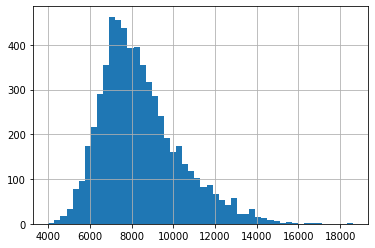

In [24]:
df['Chip_sec'].hist(bins=50)

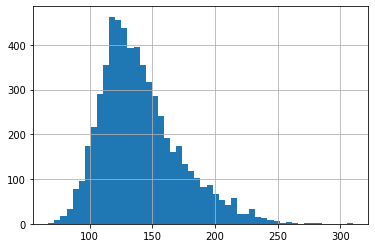

In [25]:
df['Chip_min'].hist(bins=50)

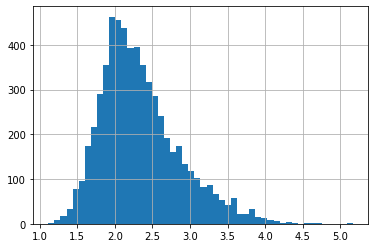

In [26]:
df['Chip_hr'].hist(bins=50)

In [27]:
df['Division'].value_counts()

F 25-29    523
F 35-39    474
F 30-34    454
M 45-49    439
F 40-44    412
M 40-44    400
M 35-39    398
M 30-34    378
F 45-49    344
M 25-29    343
M 50-54    307
F 20-24    299
F 50-54    202
M 55-59    192
M 20-24    169
F 55-59    155
M 60-64    108
F 1-19     104
M 1-19      98
F 60-64     66
M 65-69     43
F 65-69     31
F 0- 0      17
M 70-74     16
F 70-74     10
M 0- 0       9
OVERALL      6
M 75-79      5
M 80-99      3
SENIORS      2
F 75-79      2
MASTERS      2
Name: Division, dtype: int64

In [28]:
df['Gender'] = df['Division'].str.split(' ', expand=True)[0]
df['Age_Range'] = df['Division'].str.split(' ', expand=True)[1]

People who finished at the top of the division were given different Division classifications than everyone else.

In [29]:
df['Gender'].value_counts()

F          3093
M          2908
OVERALL       6
SENIORS       2
MASTERS       2
Name: Gender, dtype: int64

In [30]:
df[df['Gender']=='MASTERS']

,Chip_Time,First_Name,Last_Name,City,State,Division,Class_Position,Overall_Place,Age,Zip,Gen_Place,Total_Pace,Tot_Div,Tot_Gend,Tot_AG,5K,10K,15K,11.5M,13.1M,Country,Chip_sec,Chip_min,Chip_hr,Gender,Age_Range
10,1:15:06,Vesko,Rajovic,Plano,TX,MASTERS,1,11,44,75024,11,5:44,6508,3140,444,18:03,36:01:00,53:31:00,1:06:21,1:15:06,US,4506,75.100000,1.251667,MASTERS,None
71,1:26:38,Rachel,Fox,Flower Mound,TX,MASTERS,1,72,44,75022,15,6:37,6508,3368,458,21:02,42:10:00,1:02:26,1:17:00,1:26:38,US,5198,86.633333,1.443889,MASTERS,None


In [31]:
#Manually convert these values

#Overall Fastest
df.loc[0,'Gender']='M'
df.loc[1,'Gender']='M'
df.loc[2,'Gender']='M'
df.loc[18,'Gender']='F'
df.loc[20,'Gender']='F'
df.loc[29,'Gender']='F'

#SENIORS
df.loc[84,'Gender']='M'
df.loc[706,'Gender']='F'

#MASTERS
df.loc[10,'Gender']='M'
df.loc[71,'Gender']='F'

In [32]:
df['Age_Range'].value_counts()

35-39    872
25-29    866
30-34    832
40-44    812
45-49    783
50-54    509
20-24    468
55-59    347
1-19     202
60-64    174
65-69     74
70-74     26
0-        26
75-79      7
80-99      3
Name: Age_Range, dtype: int64

I notice a lot of people have 0's for their age. I'll replace with an average age for now..

In [33]:
avg_age = df[df.Age>0]['Age'].mean()
avg_age

38.70242272347536

In [34]:
df.loc[df.Age==0, 'Age']= avg_age

In [35]:
for i in df.index:
    if df.loc[i]['Age']>1 and df.loc[i]['Age']<20:
        df.loc[i,'Age_Range']='1-19'
    elif df.loc[i]['Age']>=20 and df.loc[i]['Age']<=24:
        df.loc[i,'Age_Range']='20-24'
    elif df.loc[i]['Age']>=25 and df.loc[i]['Age']<=29:
        df.loc[i,'Age_Range']='25-29'
    elif df.loc[i]['Age']>=30 and df.loc[i]['Age']<=34:
        df.loc[i,'Age_Range']='30-34'
    elif df.loc[i]['Age']>=35 and df.loc[i]['Age']<=39:
        df.loc[i,'Age_Range']='35-39'
    elif df.loc[i]['Age']>=40 and df.loc[i]['Age']<=44:
        df.loc[i,'Age_Range']='40-44'
    elif df.loc[i]['Age']>=45 and df.loc[i]['Age']<=49:
        df.loc[i,'Age_Range']='45-49'
    elif df.loc[i]['Age']>=50 and df.loc[i]['Age']<=54:
        df.loc[i,'Age_Range']='50-54'
    elif df.loc[i]['Age']>=55 and df.loc[i]['Age']<=59:
        df.loc[i,'Age_Range']='55-59'
    elif df.loc[i]['Age']>=60 and df.loc[i]['Age']<=64:
        df.loc[i,'Age_Range']='60-64'
    elif df.loc[i]['Age']>=65 and df.loc[i]['Age']<=69:
        df.loc[i,'Age_Range']='65-69'
    elif df.loc[i]['Age']>=70 and df.loc[i]['Age']<=74:
        df.loc[i,'Age_Range']='70-74'
    elif df.loc[i]['Age']>=75 and df.loc[i]['Age']<=79:
        df.loc[i,'Age_Range']='75-79'
    elif df.loc[i]['Age']>=80 and df.loc[i]['Age']<99:
        df.loc[i,'Age_Range']='80-99'


In [39]:
df[['Age','Age_Range']].sample(n=10)

,Age,Age_Range
3173,27.0,25-29
4167,35.0,35-39
1830,19.0,1-19
5232,48.0,45-49
4046,26.0,25-29
6287,27.0,25-29
6077,33.0,30-34
5978,30.0,30-34
1697,35.0,35-39
3603,40.0,40-44


count    6011.000000
mean       38.702423
std        11.896958
min         9.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        83.000000
Name: Age, dtype: float64


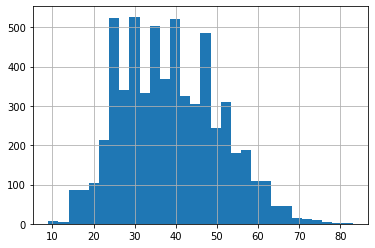

In [37]:
print(df['Age'].describe())
df['Age'].hist(bins=30)
plt.show()

In [41]:
df.dtypes

Chip_Time          object
First_Name         object
Last_Name          object
City               object
State              object
Division           object
Class_Position     object
Overall_Place      object
Age               float64
Zip                object
Gen_Place          object
Total_Pace         object
Tot_Div             int64
Tot_Gend            int64
Tot_AG              int64
5K                 object
10K                object
15K                object
11.5M              object
13.1M              object
Country            object
Chip_sec            int64
Chip_min          float64
Chip_hr           float64
Gender             object
Age_Range          object
dtype: object

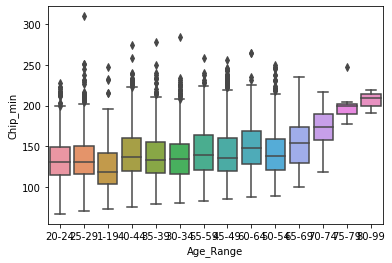

In [47]:
sns.boxplot(x='Age_Range', y='Chip_min', data=df)


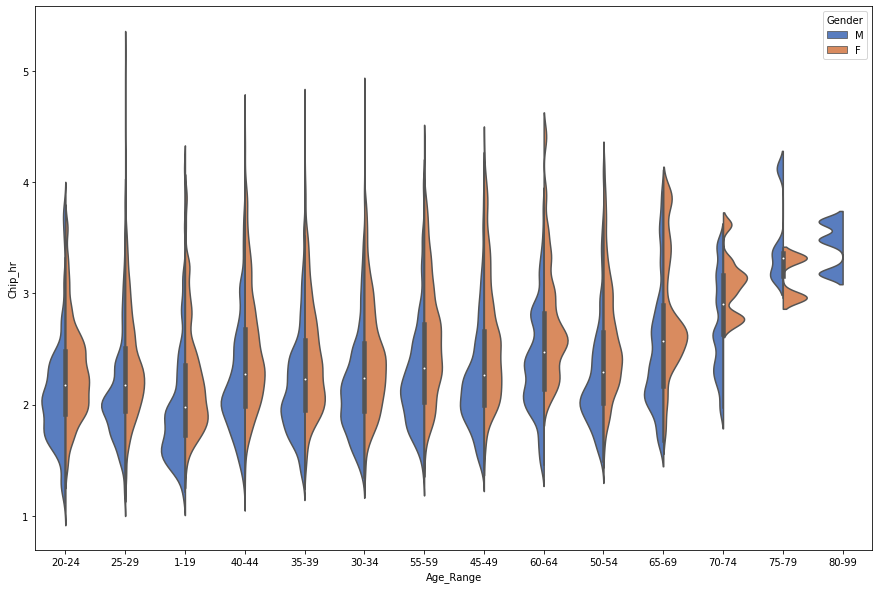

In [62]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,10

ax = sns.violinplot(x="Age_Range", y="Chip_hr", hue="Gender",
                    data=df, palette="muted", split=True, bw=.2)


